# Matplotlib fundamentals

<div style="max-width: 60ch">

This image is a good reference point when you need to customize different parts of your matplotlib graphs

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/anatomy_figure.webp?raw=true" alt="DESCRIPTION" width="300">

- [data source](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)

</div>


## Exploratory data analysis (EDA)


In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [3]:
df_quantity_make = duckdb.query(
    """
             SELECT make, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df()

df_quantity_make.head()

,Make,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar charts

### initial chart

- very hard to read
- many car brands that don't get bought too much


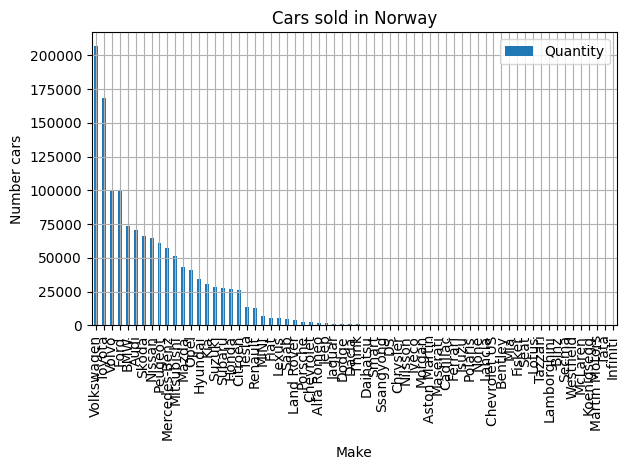

In [4]:
# using dataframes plot method which is a wrapper for matplotlib
ax = df_quantity_make.plot(
    kind="bar",
    x="Make",
    y="Quantity",
    title="Cars sold in Norway",
    ylabel="Number cars",
)
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_sold_0.png")

In [5]:
df_yearly_quantity = duckdb.query(
    """
             SELECT 
                year, SUM(quantity) as Quantity
             FROM df
             GROUP BY year
             ORDER BY year"""
).df()

df_yearly_quantity = df_yearly_quantity.set_index("Year")
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


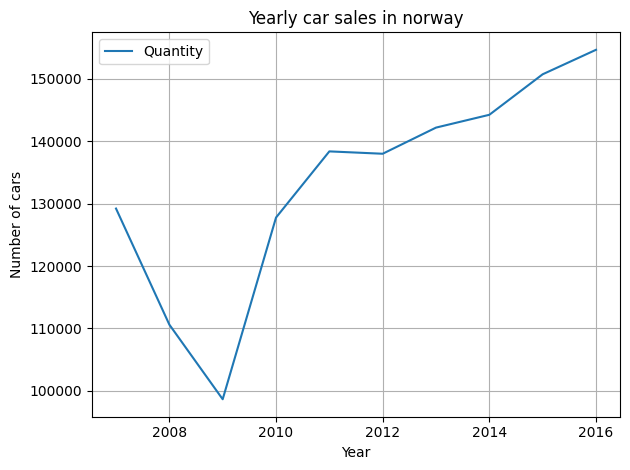

In [6]:
ax = df_yearly_quantity.iloc[:-1].plot()
ax.grid()
ax.set(title="Yearly car sales in norway", ylabel="Number of cars")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_0.png")

## Storytelling on line graph


### remove clutter

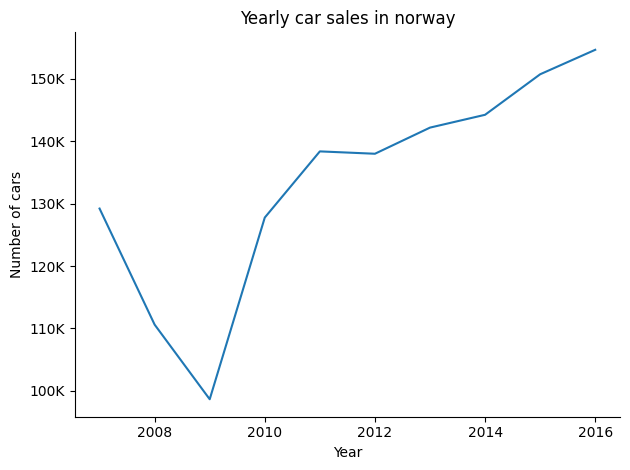

In [7]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.iloc[:-1].plot()
ax.set(title="Yearly car sales in norway", ylabel="Number of cars")
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_1.png")

### contrast 

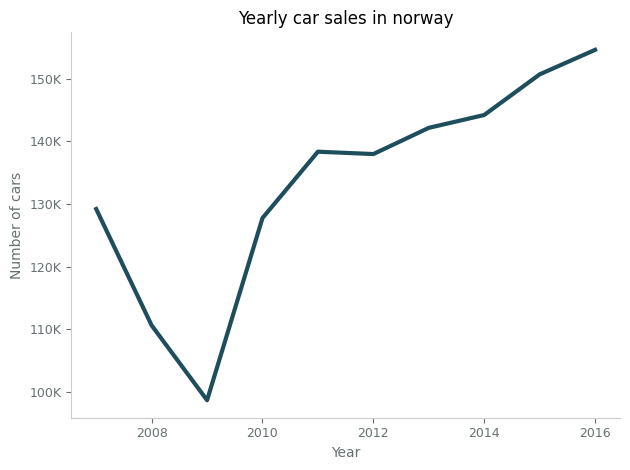

In [35]:
from matplotlib.ticker import FuncFormatter

GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
BLUE_1 = "#1E4E5C"

ax = df_yearly_quantity.iloc[:-1].plot(linewidth = 3, color = BLUE_1)#, style = "--o")
ax.set(title="Yearly car sales in norway", ylabel="Number of cars")
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis='both', labelsize=9, colors = GRAY_2)
ax.set_xlabel("Year", loc = "center", color = GRAY_2)
ax.set_ylabel("Number of cars", loc = "center", color = GRAY_2)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_2.png")

### descriptive title

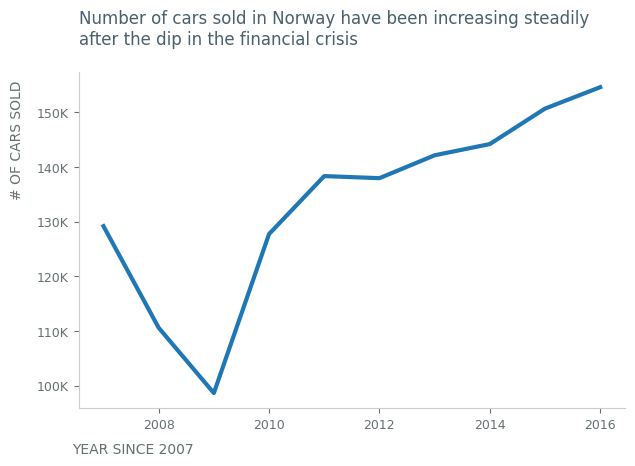

In [76]:
from matplotlib.ticker import FuncFormatter

GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
GRAY_3 = "#4A606C"
BLUE_1 = "#1E4E5C"

ax = df_yearly_quantity.iloc[:-1].plot(linewidth=3)  # , style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color = GRAY_3, pad=20
)

ax.xaxis.set_label_coords(.1, -.1)
ax.yaxis.set_label_coords(-.1, .8)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_3.png")

### annotate

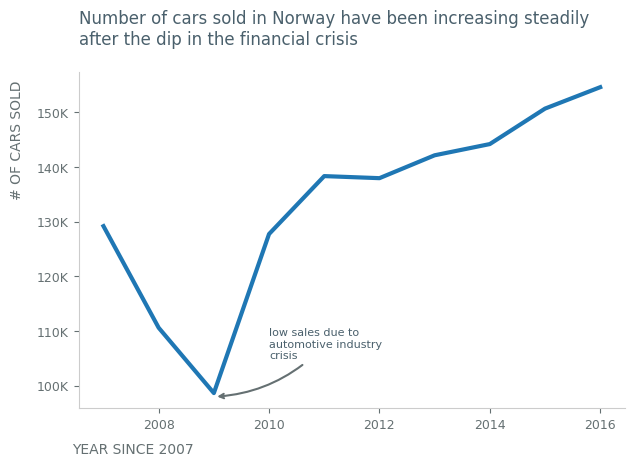

In [107]:
from matplotlib.ticker import FuncFormatter

GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
GRAY_3 = "#4A606C"
BLUE_1 = "#1E4E5C"

ax = df_yearly_quantity.iloc[:-1].plot(linewidth=3)  # , style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=20,
)

ax.xaxis.set_label_coords(0.1, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.8)


arrowprops = dict(
    arrowstyle="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2
)
ax.annotate(
    text="low sales due to \nautomotive industry\ncrisis",
    xy=(2009.01, 98000),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 105000),
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_4.png")

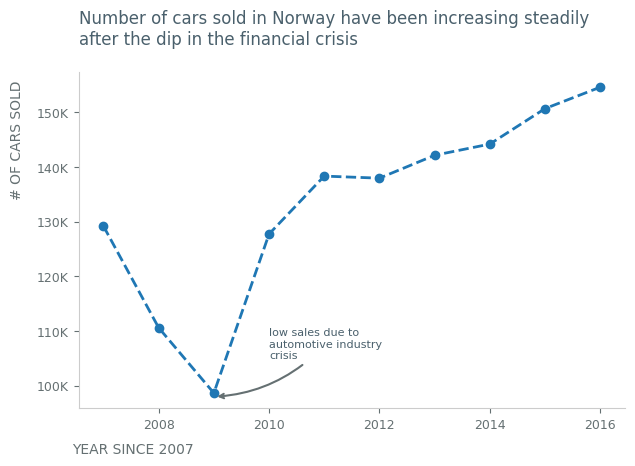

In [109]:
from matplotlib.ticker import FuncFormatter

GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
GRAY_3 = "#4A606C"
BLUE_1 = "#1E4E5C"

ax = df_yearly_quantity.iloc[:-1].plot(linewidth=2, style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=20,
)

ax.xaxis.set_label_coords(0.1, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.8)


arrowprops = dict(
    arrowstyle="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2
)
ax.annotate(
    text="low sales due to \nautomotive industry\ncrisis",
    xy=(2009.01, 98000),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 105000),
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_5.png")